<a href="https://colab.research.google.com/github/Kei-Kobayash/multiple_smiles/blob/main/Spato_temporal_permutation2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! jupyter nbconvert --execute --to html "/content/Spato_temporal_permutation2023 (1).ipynb"

[NbConvertApp] Converting notebook /content/Spato_temporal_permutation2023 (1).ipynb to html
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] Writing 3627932 bytes to /content/Spato_temporal_permutation2023 (1).html


# メモ
2023/11/20（第二弾）での内容。

追加した点


*   EC low, highに分けてpermutation
*   GFPの変曲点をマーク
*   pythonセルごとにコード内容を明記
*   EC low, highに分けて行うにあたり、各種コードを関数化












# Importing libraries

In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 50.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import mne
import pickle
from scipy import stats

# Channel location

In [ ]:
mne.channels.get_builtin_montages()

### mne pythonのビルトインモンタージュ（easycap-M1）を確認

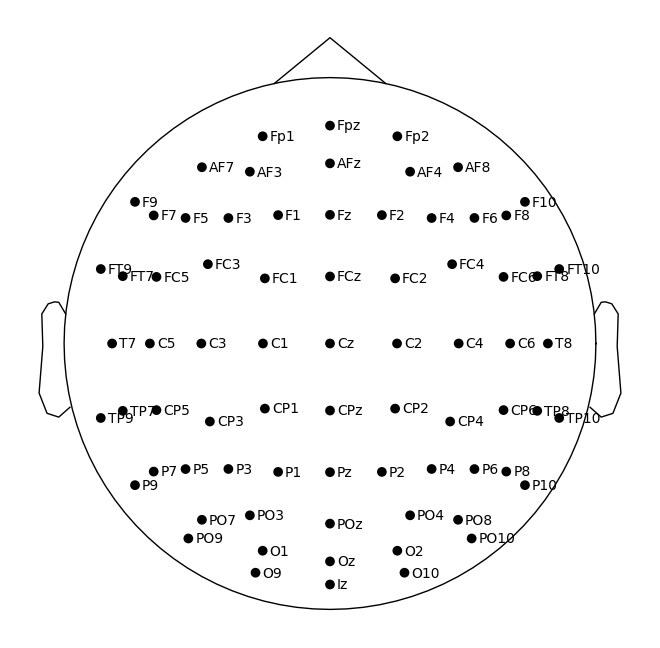

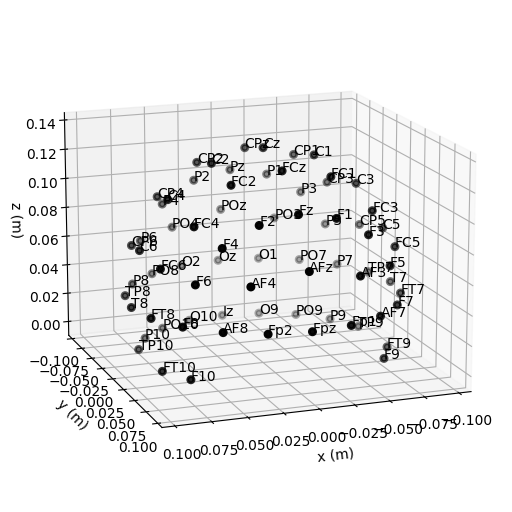

In [ ]:
easycap_montage = mne.channels.make_standard_montage("easycap-M1")
easycap_montage.plot()
fig = easycap_montage.plot(kind="3d", show = False)
fig = fig.gca().view_init(azim=70, elev=15)

chname = easycap_montage.ch_names

In [ ]:
# Channel name of easycap M1
print(chname)

['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'F1', 'F2', 'FC1', 'FC2', 'C1', 'C2', 'CP1', 'CP2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'FC5', 'FC6', 'C5', 'C6', 'CP5', 'CP6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'F9', 'F10', 'FT9', 'FT10', 'TP9', 'TP10', 'P9', 'P10', 'PO9', 'PO10', 'O9', 'O10', 'Fpz', 'AFz', 'FCz', 'CPz', 'POz', 'Oz', 'Iz']


### mneの公式からeasycapのXYZ座標のデータを取得し、今回使う電極のみを抽出してcsvを作成

In [ ]:
# Load the easycap-M1 montage
easycap_montage = mne.channels.make_standard_montage("easycap-M1")

# Define the electrode names I want to extract（今回の実験で用いた電極）
selected_electrodes = ["Fp1", "Fp2", "F3", "F4", "F7", "F8", "C3", "C4", "P3", "P4", "T7", "T8", "P7", "P8", "PO3", "PO4", "PO7", "PO8", "O1", "O2", "Fz", "Cz", "Pz", "POz", "Oz"]

# Filter the montage to keep only the selected electrodes（確認：元と違う数値を返すため、これは結局使っていない。）
selected_positions = {ch_name: easycap_montage.dig[easycap_montage.ch_names.index(ch_name)]['r'] for ch_name in selected_electrodes}

posi = easycap_montage.get_positions()
print(posi)

# Extract the 'ch_pos' dictionary
ch_pos_dict = posi['ch_pos']

# Create a DataFrame
df_ch_position = pd.DataFrame(ch_pos_dict).T.reset_index()

# Rename the columns
df_ch_position.columns = ['Channel', 'X', 'Y', 'Z']

df_ch_position.head()

filtered_df_ch_position = df_ch_position[df_ch_position['Channel'].isin(selected_positions)]

filtered_df_ch_position.to_csv("electrode_position.csv", index=False)

{'ch_pos': OrderedDict([('Fp1', array([-0.02933873,  0.09029533, -0.00331545])), ('Fp2', array([ 0.02933873,  0.09029533, -0.00331545])), ('F3', array([-0.05177571,  0.06393767,  0.0475    ])), ('F4', array([0.05177571, 0.06393767, 0.0475    ])), ('C3', array([-0.06833728, -0.        ,  0.06599255])), ('C4', array([0.06833728, 0.        , 0.06599255])), ('P3', array([-0.05177571, -0.06393767,  0.0475    ])), ('P4', array([ 0.05177571, -0.06393767,  0.0475    ])), ('O1', array([-0.02933873, -0.09029533, -0.00331545])), ('O2', array([ 0.02933873, -0.09029533, -0.00331545])), ('F7', array([-0.0768098 ,  0.05580558, -0.00331545])), ('F8', array([ 0.0768098 ,  0.05580558, -0.00331545])), ('T7', array([-0.09494213, -0.        , -0.00331545])), ('T8', array([ 0.09494213,  0.        , -0.00331545])), ('P7', array([-0.0768098 , -0.05580558, -0.00331545])), ('P8', array([ 0.0768098 , -0.05580558, -0.00331545])), ('Fz', array([4.18445162e-18, 6.83372810e-02, 6.59925452e-02])), ('Cz', array([0.   

In [ ]:
"""
print(easycap_montage.ch_names)

# Create lists to store data
ch_names = []
positions = []

# Loop through each electrode and gather data
for ch_name, dig_point in zip(easycap_montage.ch_names, easycap_montage.dig):
    ch_names.append(ch_name)
    positions.append(dig_point['r'])

# Create a DataFrame with electrode names and positions
df_easycap = pd.DataFrame({'Electrode': ch_names, 'Position': positions})

# Split the 'Position' column into X, Y, Z columns
df_easycap[['X', 'Y', 'Z']] = pd.DataFrame(df_easycap['Position'].tolist(), index=df_easycap.index)

# Drop the original 'Position' column
df_easycap.drop(columns=['Position'], inplace=True)

# Display the DataFrame
print(df_easycap)

# Save the DataFrame to a CSV file
df_easycap.to_csv('easycap_dig_information.csv', index=False)
"""

['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'F1', 'F2', 'FC1', 'FC2', 'C1', 'C2', 'CP1', 'CP2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'FC5', 'FC6', 'C5', 'C6', 'CP5', 'CP6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'F9', 'F10', 'FT9', 'FT10', 'TP9', 'TP10', 'P9', 'P10', 'PO9', 'PO10', 'O9', 'O10', 'Fpz', 'AFz', 'FCz', 'CPz', 'POz', 'Oz', 'Iz']
   Electrode             X         Y         Z
0        Fp1 -8.609924e-02 -0.000000 -0.040149
1        Fp2  5.272058e-18  0.086099 -0.040149
2         F3  8.609924e-02  0.000000 -0.040149
3         F4 -2.933873e-02  0.090295 -0.003315
4         C3  2.933873e-02  0.090295 -0.003315
..       ...           ...       ...       ...
69       FCz  2.660613e-02 -0.081885 -0.040149
70       CPz  5.813529e-18  0.094942 -0.003315
71       POz  5.430705e-18  0.088690  0.034045
72        Oz  2.272911e-18  0.037119  0.08

### 上で作った電極位置csvの情報を用いて、infoオブジェクトを作成し、montageにつける

<ipython-input-5-366cb8c498b0>:9: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  custom_montage.plot()


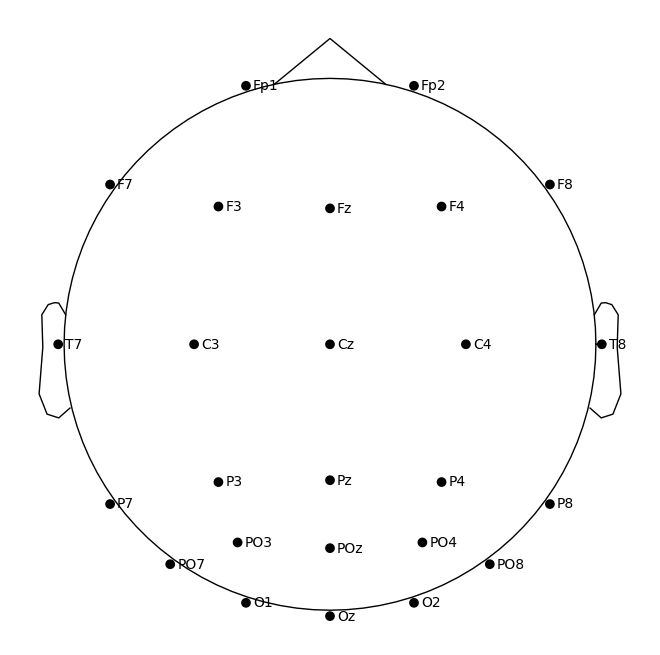

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 25


In [ ]:
# Load the CSV file into a Pandas DataFrame
#montage_df = pd.read_csv('easycap_dig_information_filtered.csv')
montage_df = pd.read_csv("electrode_position.csv")

# Create a Montage object from the DataFrame
custom_montage = mne.channels.make_dig_montage(ch_pos=dict(zip(montage_df['Channel'], montage_df[['X', 'Y', 'Z']].values)))

# Plot the custom montage to verify
custom_montage.plot()

# Create the info object with positions
info = mne.create_info(ch_names=montage_df['Channel'].tolist(), sfreq=250, ch_types='eeg')


# Create a Montage with digitization points
montage = mne.channels.make_dig_montage(ch_pos=dict(zip(montage_df['Channel'], montage_df[['X', 'Y', 'Z']].values)), coord_frame='head')

# Set the montage to the info object
info.set_montage(montage)

# Calculate the adjacency matrix
adjacency, ch_names = mne.channels.find_ch_adjacency(info, ch_type='eeg')


In [ ]:
ch_names

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T7',
 'T8',
 'P7',
 'P8',
 'Fz',
 'Cz',
 'Pz',
 'PO3',
 'PO4',
 'PO7',
 'PO8',
 'POz',
 'Oz']

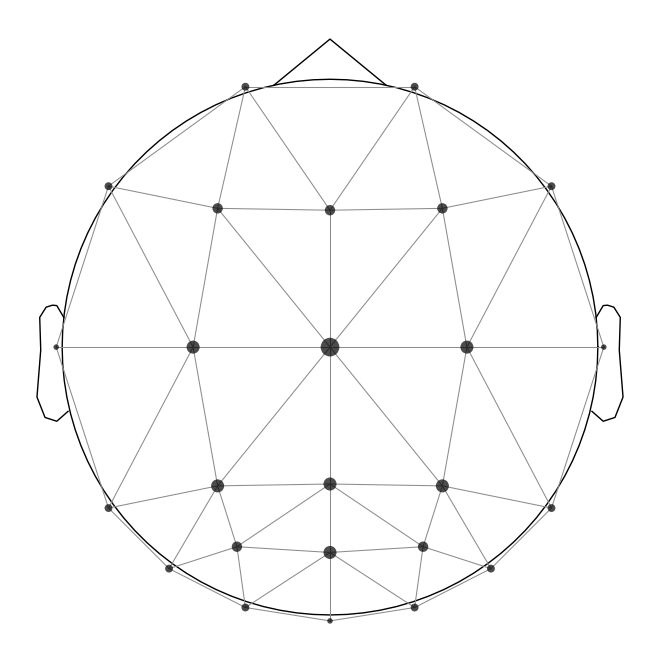

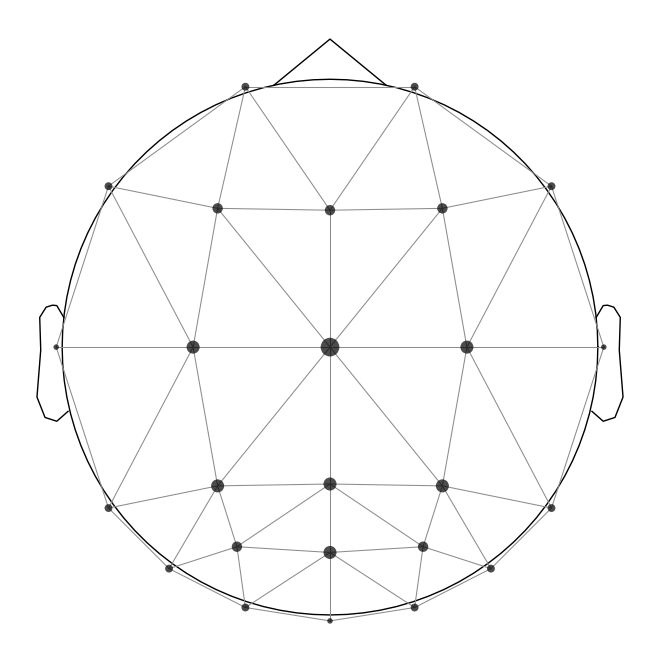

In [ ]:
adjacency
mne.viz.plot_ch_adjacency(info, adjacency, ch_names)

In [ ]:
montage.dig

In [ ]:
"""
mon = mne.channels.read_custom_montage("Ch29n_kei.locs", coord_frame="head")
mon.plot()
"""

# Import data

### 参加者リストを作成

In [ ]:
# Participant list
last_par_num = 28
excluded_pars = ["s10"]

participants = []

for n in range(1, last_par_num+1):
  participants.append("s" + str(n))

for excluded_par in excluded_pars:
  participants.remove(excluded_par)

print(participants)

['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28']


### smile0と3のtxtファイルを読み込み、dfにする

In [ ]:
# Import each participant's csv (time * electrode) and add it to df_list (list of data frame)

def txt_to_df(participant_list):
  df_list_cond1 = []
  df_list_cond2 = []

  for n, par in enumerate(participant_list, start=1):
    df_cond1 = pd.read_csv("happy_" + par + "_ERP_Smile 0 .txt", delimiter='\t', index_col=0, header=None)
    df_cond2 = pd.read_csv("happy_" + par + "_ERP_Smile 3 .txt", delimiter='\t', index_col=0, header=None)
    df_list_cond1.append(df_cond1.transpose())
    df_list_cond2.append(df_cond2.transpose())
  return df_list_cond1, df_list_cond2

In [ ]:
df_list_cond1, df_list_cond2 = txt_to_df(participants)

In [ ]:
# 出力チェック（[]内の数字は参加者番号ではないので注意）
display(df_list_cond1[1])

,time,VEOGL,HEOGL,HEOGR,Fp1,Fp2,F7,F3,Fz,F4,...,P8,PO7,PO3,POz,PO4,PO8,O1,Oz,O2,Ref
1,-100.0,0.1528,0.2327,0.1552,-0.0663,0.1537,0.4520,0.5354,0.6979,0.6734,...,-0.1764,1.0575,0.2659,-0.9795,-1.8490,-0.6997,0.2714,-0.4338,-1.0313,0.0
2,-96.0,0.1197,0.2065,0.1905,-0.0263,0.2276,0.4907,0.5946,0.6914,0.6485,...,0.4053,1.8117,0.9988,-0.5041,-1.3073,0.0130,1.0059,0.0432,-0.5553,0.0
3,-92.0,0.0684,0.1519,0.1792,-0.0104,0.1783,0.4563,0.5708,0.6232,0.5592,...,0.9541,2.4211,1.5969,-0.0627,-0.7459,0.6929,1.6086,0.4520,-0.1003,0.0
4,-88.0,0.0030,0.0825,0.1216,-0.0353,0.0251,0.3631,0.4720,0.5030,0.4237,...,1.4489,2.8775,2.0373,0.3360,-0.1882,1.3262,2.0558,0.7876,0.3239,0.0
5,-84.0,-0.0649,0.0153,0.0370,-0.1091,-0.1838,0.2348,0.3170,0.3459,0.2619,...,1.8665,3.1811,2.3161,0.6956,0.3493,1.8977,2.3433,1.0569,0.7184,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,484.0,-0.7454,-0.5883,4.0029,3.8799,5.4002,2.9875,5.5271,7.7684,8.3009,...,7.8094,8.0034,10.3018,9.7204,8.8406,5.7605,8.7284,7.8502,6.5899,0.0
148,488.0,-0.8431,-0.6572,4.1093,3.8667,5.3122,2.8114,5.1674,7.1432,7.8334,...,7.4165,7.9028,9.9219,9.3081,8.6578,5.3481,8.5703,7.6735,6.3738,0.0
149,492.0,-0.9195,-0.7033,4.2003,3.8715,5.3136,2.6834,4.8699,6.5562,7.3452,...,6.8783,7.7343,9.5429,9.0324,8.4685,4.8517,8.4429,7.6192,6.1901,0.0
150,496.0,-0.9750,-0.7171,4.2660,3.9069,5.4304,2.6311,4.6497,6.0440,6.8581,...,6.2238,7.5220,9.2121,8.8979,8.2548,4.3084,8.3459,7.6593,6.0266,0.0


### 参加者全員のデータを重ねる。=>3次元配列を作成（参加者×タイムポイント×チャンネル）

In [ ]:
def create_3darray(df1, df2):
  # Convert each DataFrame to a NumPy array
  array_list_cond1 = [df.to_numpy() for df in df1]
  array_list_cond2 = [df.to_numpy() for df in df2]

  # Stack the NumPy arrays along the first dimension to create a 3D array
  # axis=0は、デフォルトなので指定しなくてもいい。これは奥行き方向に重ねることを意味する。
  three_dim_array_cond1 = np.stack(array_list_cond1, axis=0)
  three_dim_array_cond2 = np.stack(array_list_cond2, axis=0)

  return three_dim_array_cond1, three_dim_array_cond2

In [ ]:
three_dim_array_cond1, three_dim_array_cond2 = create_3darray(df_list_cond1, df_list_cond2)

# Check the shape of the resulting 3D array
print(three_dim_array_cond1.shape)
print(three_dim_array_cond2.shape)

(27, 151, 30)
(27, 151, 30)


### Extract specific time range

In [ ]:
columns = df_list_cond1[1].columns[1:]
print(columns.to_list())

['VEOGL', 'HEOGL', 'HEOGR', 'Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Ref']


In [ ]:
def time_filter(three_dim_array_cond1, three_dim_array_cond2, t_min, t_max):
  t_min = 140
  t_max = 240

  timed_cond1 = (three_dim_array_cond1[:, (t_min <= three_dim_array_cond1[0, :, 0]) & (three_dim_array_cond1[0, :, 0] <= t_max), 1:])
  electrodes_to_remove = ["HEOGL", "HEOGR", "VEOGL", "Ref"]

  columns = df_list_cond1[1].columns[1:]
  electrode_names = columns.to_list()  # 25電極の名前が入ったリストと仮定

  # 電極を削除する
  selected_electrodes = [elec for elec in electrode_names if elec not in electrodes_to_remove]
  print(len(selected_electrodes)) # 確認用：今回は25になるはず

  # 新しい配列を作成する
  timed_cond1_filtered = timed_cond1[:, :, [electrode_names.index(elec) for elec in selected_electrodes]]

  # 時間の配列を作る
  time = (three_dim_array_cond1[0, (t_min <= three_dim_array_cond1[0, :, 0]) & (three_dim_array_cond1[0, :, 0] <= t_max), 0])

  timed_cond2 = (three_dim_array_cond2[:, (t_min <= three_dim_array_cond2[0, :, 0]) & (three_dim_array_cond2[0, :, 0] <= t_max), 1:])
  timed_cond2_filtered = timed_cond2[:, :, [electrode_names.index(elec) for elec in selected_electrodes]]


  # 条件を満たす要素を抽出
  filtered_data_cond1 = timed_cond1_filtered.reshape(timed_cond1_filtered.shape[0], timed_cond1_filtered.shape[1], timed_cond1_filtered.shape[2])
  filtered_data_cond2 = timed_cond2_filtered.reshape(timed_cond2_filtered.shape[0], timed_cond2_filtered.shape[1], timed_cond2_filtered.shape[2])

  return filtered_data_cond1, filtered_data_cond2, selected_electrodes, time, t_min, t_max

In [ ]:
filtered_data_cond1, filtered_data_cond2, selected_electrodes, time, t_min, t_max = time_filter(three_dim_array_cond1, three_dim_array_cond2, 140, 240)

25


### Check

In [ ]:
# for check

# 参加者1人分を取得
cur = filtered_data_cond1[1]

# index（行名）を時間に、columns（列名）を電極に
df = pd.DataFrame(cur, index=time, columns=selected_electrodes)
df.head()

,Fp1,Fp2,F7,F3,Fz,F4,F8,T7,C3,Cz,...,P4,P8,PO7,PO3,POz,PO4,PO8,O1,Oz,O2
140.0,-0.3934,-0.2161,-0.0345,-0.4962,-0.2787,0.1408,-0.4547,0.4236,1.7826,1.0476,...,4.3209,3.8215,7.5762,8.8161,10.1404,2.7288,4.3865,10.3086,10.4467,5.9169
144.0,-0.1255,0.0354,0.2466,-0.0587,0.2363,0.6264,-0.2480,0.2011,1.9046,1.4015,...,3.3625,1.7647,6.0877,8.2690,9.8687,1.0755,1.8248,9.3720,9.6648,4.3799
148.0,0.1527,0.3795,0.5376,0.4355,0.8100,1.1994,0.0300,-0.0034,2.0414,1.7987,...,2.6911,-0.0955,4.5060,7.7858,9.6013,-0.1241,-0.3464,8.3737,8.8015,3.0389
152.0,0.4728,0.8333,0.8303,0.9749,1.4367,1.8451,0.3746,-0.1189,2.2445,2.2820,...,2.3782,-1.6222,2.9733,7.4333,9.4089,-0.7715,-1.9867,7.4396,7.9884,2.0215
156.0,0.8567,1.4006,1.1120,1.5300,2.0972,2.5351,0.7716,-0.1046,2.5381,2.8656,...,2.4194,-2.7816,1.5688,7.2328,9.3310,-0.8735,-3.0958,6.6409,7.3190,1.3703


In [ ]:
# 参加者1人分を取得
cur2 = filtered_data_cond2[1]

# index（行名）を時間に、columns（列名）を電極に
df2 = pd.DataFrame(cur2, index=time, columns=selected_electrodes)
df2.head()

,Fp1,Fp2,F7,F3,Fz,F4,F8,T7,C3,Cz,...,P4,P8,PO7,PO3,POz,PO4,PO8,O1,Oz,O2
140.0,0.4318,-0.0236,-0.0115,0.1898,-0.1373,-0.5681,-1.1264,0.7795,2.5756,1.8009,...,3.0085,4.1759,8.8002,10.1491,9.3667,1.9273,4.1844,10.6643,9.7095,5.3811
144.0,0.6300,0.2686,0.2707,0.6855,0.4218,-0.1016,-0.9908,0.5642,2.9324,2.2460,...,2.6576,2.8665,8.2386,10.4066,9.7603,0.9018,2.7334,10.6218,9.5895,4.5293
148.0,0.8530,0.6619,0.5404,1.2400,1.0606,0.4785,-0.7840,0.3104,3.2609,2.7302,...,2.4553,1.5143,7.4449,10.5732,10.0606,0.1524,1.3921,10.3689,9.3005,3.6852
152.0,1.1228,1.1549,0.7766,1.8130,1.7482,1.1436,-0.4951,0.0949,3.5664,3.2664,...,2.4287,0.2267,6.4498,10.6244,10.2563,-0.2590,0.2553,9.9313,8.8916,2.9365
156.0,1.4545,1.7217,0.9681,2.3643,2.4484,1.8524,-0.1237,-0.0125,3.8350,3.8490,...,2.5730,-0.9490,5.2546,10.5113,10.3440,-0.3237,-0.6690,9.3142,8.4054,2.3378


引き算（2人目）が正しくXに反映されていることを確認した。↓

In [ ]:
print(-0.3934 - 0.4318)

-0.8252


## Compute differences between 2 conditions

The first dimension of X should correspond to the difference between paired samples (observations) in two conditions. The second dimension correspond to the time. And, the last dimension should be spatial.

In [ ]:
def compute_diff(filtered_data_cond1, filtered_data_cond2):
  cond1 = np.array(filtered_data_cond1)
  cond2 = np.array(filtered_data_cond2)

  X = cond1 - cond2
  return X

In [ ]:
compute_diff(filtered_data_cond1, filtered_data_cond2)
print(X)

[[[ 6.6710e-01  4.8180e-01 -6.5690e-01 ...  7.4200e-01  7.9330e-01
    6.5010e-01]
  [ 2.1410e-01  6.0590e-01 -4.3860e-01 ...  6.7180e-01  6.6120e-01
    6.3760e-01]
  [-2.6120e-01  6.1510e-01 -3.9060e-01 ...  5.0280e-01  4.3560e-01
    4.7370e-01]
  ...
  [-1.5440e-01 -7.6550e-01  6.0000e-02 ...  1.8011e+00  1.6777e+00
    1.0207e+00]
  [-2.7000e-03 -1.0371e+00  9.2000e-02 ...  1.6685e+00  1.6762e+00
    1.0644e+00]
  [ 3.4930e-01 -1.0051e+00  8.2600e-02 ...  1.4561e+00  1.5612e+00
    1.0235e+00]]

 [[-8.2520e-01 -1.9250e-01 -2.3000e-02 ... -3.5570e-01  7.3720e-01
    5.3580e-01]
  [-7.5550e-01 -2.3320e-01 -2.4100e-02 ... -1.2498e+00  7.5300e-02
   -1.4940e-01]
  [-7.0030e-01 -2.8240e-01 -2.8000e-03 ... -1.9952e+00 -4.9900e-01
   -6.4630e-01]
  ...
  [-1.1103e+00 -1.8250e+00 -4.4700e-02 ...  1.3189e+00  9.3840e-01
    8.4450e-01]
  [-1.0708e+00 -1.8177e+00  2.3000e-03 ...  1.2745e+00  7.8520e-01
    5.3610e-01]
  [-1.0262e+00 -1.7101e+00  6.5600e-02 ...  1.1645e+00  5.4090e-01
    1.

# MNE python spatio-temporal cluster test

adjacency matrixのサイズ確認（電極数×電極数の正方行列）

注意：データの電極数と異なると以下のエラーが発生する。ValueError: adjacency (len 25) must be of the correct size, i.e. be equal to or evenly divide the number of tests (725).

In [ ]:
print(adjacency.shape)

(25, 25)


In [ ]:
t_obs, clusters, cluster_pv, H0 = mne.stats.spatio_temporal_cluster_1samp_test(X, threshold=None, n_permutations=1000, tail=0, stat_fun=None, adjacency=adjacency, n_jobs=None, seed=None, max_step=1, spatial_exclude=None, step_down_p=0, t_power=1, out_type='indices', check_disjoint=False, buffer_size=1000, verbose=None)

Using a threshold of 2.055529
stat_fun(H1): min=-3.815260 max=2.436610
Running initial clustering …
Found 10 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Note: The following error arises if the matrix shape is not what is expected. More specifically, the matrix should be square and row/column should have the number of electrodes. ValueError: adjacency (len 25) must be of the correct size, i.e. be equal to or evenly divide the number of tests (725).

# Visualization

[(array([ 7,  8,  9, 10, 11]), array([20, 20, 20, 20, 20])), (array([ 9, 10, 11]), array([24, 24, 24])), (array([11, 12, 13, 14]), array([16, 16, 16, 16])), (array([0, 1, 2, 3, 4]), array([12, 12, 12, 12, 12])), (array([1, 2]), array([17, 17])), (array([13, 14, 15, 16, 16, 17, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22,
       23, 24, 25]), array([3, 3, 3, 3, 7, 3, 5, 7, 3, 5, 3, 5, 3, 5, 3, 5, 3, 3, 3, 3])), (array([13, 14, 15, 16, 17, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24,
       24, 25, 25]), array([ 8,  8,  8,  8,  8,  8,  8, 19,  8, 19,  8, 19,  8, 19,  8, 19,  8,
       19,  8, 19])), (array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]), array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])), (array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25]), array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9])), (array([18, 19]), array([0, 0]))]
[0.599 0.737 0.663 0.572 0.781 0.219 0.231 0.32  0.339 0.787]


Text(0.5, 0, 'time (ms)')

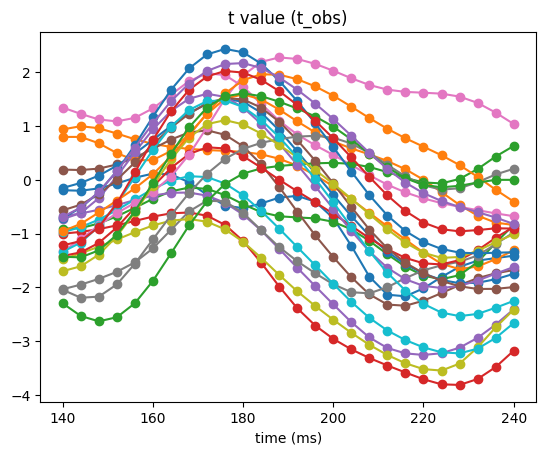

In [ ]:
#print(t_obs) # observed t-value for each time point
print(clusters) # clusters
print(cluster_pv) # p-value for each clusters identified above
#print(H0)

# Plottign t-values for each time point
import matplotlib.pyplot as plt
plt.plot(np.arange(140, 244, 4), t_obs, marker='o')
plt.title("t value (t_obs)")
plt.xlabel("time (ms)")

### infoオブジェクトの電極確認

In [ ]:
channel_labels = info['ch_names']
dict_channel = {}

for i, label in enumerate(channel_labels):
    dict_channel[i] = label

print(dict_channel)

{0: 'Fp1', 1: 'Fp2', 2: 'F3', 3: 'F4', 4: 'C3', 5: 'C4', 6: 'P3', 7: 'P4', 8: 'O1', 9: 'O2', 10: 'F7', 11: 'F8', 12: 'T7', 13: 'T8', 14: 'P7', 15: 'P8', 16: 'Fz', 17: 'Cz', 18: 'Pz', 19: 'PO3', 20: 'PO4', 21: 'PO7', 22: 'PO8', 23: 'POz', 24: 'Oz'}


### selected channels（実際に引数として渡したデータXの列＝電極）

In [ ]:
print(selected_electrodes)
electrode_dict = {index:value for index, value in enumerate(selected_electrodes)}
print(electrode_dict)

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']


メモ：以下のチャンネル番号は、info objectのチャンネル番号ではなく、引数にしたデータXの列の番号

### クラスタ情報（time, channel）：有意かどうかに関わらず全て

In [ ]:
df_cluster_result = pd.DataFrame([(str(t_min + (time*1000/info['sfreq'])), str(channel)) for time, channel in clusters], columns=["time", "channel"])

# []を取り除く
df_cluster_result["channel"] = df_cluster_result["channel"].str.replace(r"\[|\]", "")
#df_cluster_result['channel'] = df_cluster_result['channel'].apply(lambda x: list(map(int, x.split())))
df_cluster_result["time"] = df_cluster_result["time"].str.replace(r"\[|\]", "")

# チャンネル名をラベルに（その際、channelの列のセルには複数の数値が入っているので、splitしてから）
df_cluster_result["channel"] = df_cluster_result["channel"].apply(lambda x: ' '.join([electrode_dict[int(value)] for value in x.split()]))
df_cluster_result

<ipython-input-31-8f298c808555>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cluster_result["channel"] = df_cluster_result["channel"].str.replace(r"\[|\]", "")
<ipython-input-31-8f298c808555>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cluster_result["time"] = df_cluster_result["time"].str.replace(r"\[|\]", "")


,time,channel
0,168. 172. 176. 180. 184.,PO4 PO4 PO4 PO4 PO4
1,176. 180. 184.,O2 O2 O2
2,184. 188. 192. 196.,P8 P8 P8 P8
3,140. 144. 148. 152. 156.,P7 P7 P7 P7 P7
4,144. 148.,PO7 PO7
5,192. 196. 200. 204. 204. 208. 208. 208. 212. 2...,F3 F3 F3 F3 T7 F3 F4 T7 F3 F4 F3 F4 F3 F4 F3 F...
6,192. 196. 200. 204. 208. 212. 216. 216. 220. 2...,C3 C3 C3 C3 C3 C3 C3 POz C3 POz C3 POz C3 POz ...
7,200. 204. 208. 212. 216. 220. 224. 228. 232. 2...,Fz Fz Fz Fz Fz Fz Fz Fz Fz Fz Fz
8,204. 208. 212. 216. 220. 224. 228. 232. 236. 240.,Cz Cz Cz Cz Cz Cz Cz Cz Cz Cz
9,212. 216.,Fp1 Fp1


↑行2の値は、P8のみで行ったtemporal cluster analysisの結果と一致。

### 5%水準で有意なクラスターはあるか？

In [ ]:
if any(pv<0.05 for pv in cluster_pv):
  print("Yes, there is a significant cluster(s)")
else:
  print("No, there is not")

No, there is not


## EC grouping & MNE python

### Preparing participant lists (based on EC)

In [ ]:
lows = [1, 2, 3, 8, 11, 12, 15, 16, 20, 21, 22, 23, 24]
lowss = [f"s{low}" for low in lows]
print(lowss)

highs = [4, 5, 6, 7, 9, 13, 14, 17, 18, 19, 25, 26, 27, 28]
highss = [f"s{high}" for high in highs]
print(highss)

['s1', 's2', 's3', 's8', 's11', 's12', 's15', 's16', 's20', 's21', 's22', 's23', 's24']
['s4', 's5', 's6', 's7', 's9', 's13', 's14', 's17', 's18', 's19', 's25', 's26', 's27', 's28']


In [ ]:
df_list_EClow, df_list_EChigh = txt_to_df()

## Visualization of ERPs

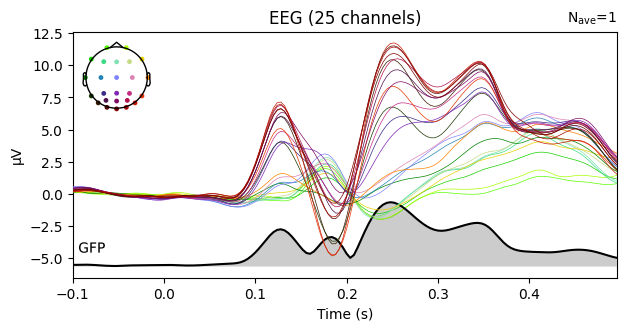

,Fp1,Fp2,F7,F3,Fz,F4,F8,T7,C3,Cz,...,P4,P8,PO7,PO3,POz,PO4,PO8,O1,Oz,O2
time,,,,,,,,,,,,,,,,,,,,,
-100.0,1.249333e-07,1.470556e-07,1.337185e-07,3.256889e-07,3.544815e-07,3.365074e-07,1.763296e-07,2.807037e-07,5.035296e-07,5.730222e-07,...,4.290630e-07,1.986370e-07,2.981407e-07,4.032481e-07,3.703000e-07,2.618000e-07,1.433037e-07,2.633111e-07,2.771815e-07,1.990519e-07
-96.0,9.902593e-08,1.311926e-07,1.011593e-07,3.067111e-07,3.335407e-07,3.002519e-07,1.411111e-07,2.443037e-07,4.952000e-07,5.642889e-07,...,4.531259e-07,2.421741e-07,3.390037e-07,4.502556e-07,4.012852e-07,2.883296e-07,1.671370e-07,3.086926e-07,3.087519e-07,2.247667e-07
-92.0,9.159630e-08,1.053926e-07,8.451852e-08,2.846037e-07,3.174667e-07,2.706111e-07,1.162852e-07,1.865407e-07,4.866852e-07,5.532481e-07,...,4.735704e-07,2.873481e-07,3.752074e-07,4.849259e-07,4.279519e-07,3.136148e-07,2.016556e-07,3.418593e-07,3.342889e-07,2.470407e-07
-88.0,9.422222e-08,7.314815e-08,8.066296e-08,2.576963e-07,3.003111e-07,2.458852e-07,1.014333e-07,1.204889e-07,4.697222e-07,5.335333e-07,...,4.824370e-07,3.239037e-07,3.979370e-07,4.985741e-07,4.426519e-07,3.320370e-07,2.401259e-07,3.567481e-07,3.465704e-07,2.595111e-07
-84.0,9.518889e-08,3.890741e-08,8.353333e-08,2.236889e-07,2.740963e-07,2.199741e-07,9.152222e-08,6.349259e-08,4.368185e-07,4.985741e-07,...,4.719852e-07,3.405519e-07,3.981407e-07,4.839741e-07,4.382815e-07,3.364667e-07,2.714074e-07,3.487074e-07,3.402778e-07,2.574556e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480.0,7.443000e-07,1.278059e-06,1.584781e-06,1.588437e-06,1.760593e-06,2.354307e-06,2.936922e-06,2.604789e-06,3.243359e-06,3.269052e-06,...,4.106956e-06,2.950759e-06,3.273048e-06,3.891915e-06,4.363596e-06,4.095456e-06,2.804926e-06,3.625226e-06,3.876578e-06,3.610107e-06
484.0,7.234926e-07,1.271437e-06,1.428193e-06,1.347493e-06,1.512852e-06,2.163581e-06,2.866737e-06,2.353211e-06,2.927315e-06,2.939589e-06,...,3.750911e-06,2.651378e-06,2.871159e-06,3.476859e-06,3.956174e-06,3.705781e-06,2.448496e-06,3.238422e-06,3.508530e-06,3.234933e-06
488.0,7.226889e-07,1.294156e-06,1.303941e-06,1.140096e-06,1.298515e-06,2.000467e-06,2.817722e-06,2.116400e-06,2.630985e-06,2.634393e-06,...,3.400244e-06,2.358467e-06,2.485793e-06,3.076030e-06,3.561848e-06,3.322819e-06,2.103811e-06,2.869037e-06,3.152119e-06,2.869056e-06


In [ ]:
def create_evoked(cond_name, evoked_name):
  # Calculate the mean along the first axis (axis=0)
  ave = np.mean(cond_name, axis=0)

  time = df_list_cond1[1]["time"]
  columns = list(df_list_cond1[1].columns)

  # Create DataFrame and set the first column as the index
  ave_df = pd.DataFrame(ave, index=time, columns=columns)
  ave_df.set_index(ave_df.columns[0], inplace=True)
  ave_df = ave_df.iloc[:-1] # the last row contains NaN, so delete it

  columns_to_delete = ['Ref', 'HEOGL', 'HEOGR', 'VEOGL']
  ave_df = ave_df.drop(columns=columns_to_delete)

  # Extract relevant information
  time_points = ave_df.index.astype(float)
  channel_names = list(ave_df.columns)

  # Create an info structure for MNE-Python
  sfreq = 250  # attention! not 250 Hz
  info = mne.create_info(channel_names, sfreq, ch_types='eeg')
  info.set_montage(montage)

  # Convert tmin to seconds
  tmin_seconds = time_points[0] / 1000.0

  # Create Evoked objects for each condition using the average data
  evoked_obj = mne.EvokedArray(ave_df.iloc[:, :].values.T, info, tmin=tmin_seconds, comment=evoked_name)
  return evoked_obj, ave_df

evoked_condition1, ave_df = create_evoked(three_dim_array_cond1, "evoked_condition1")
# Specify the scaling factor and manually scale the data
scaling_factor = 1e-6
evoked_condition1.data *= scaling_factor

evoked_condition1.plot(spatial_colors=True, gfp=True)

# Alternatively, we can compare the average evoked data between conditions
#mne.viz.plot_evoked_comparison([evoked_condition1, evoked_condition2], picks='eeg')

ave_df

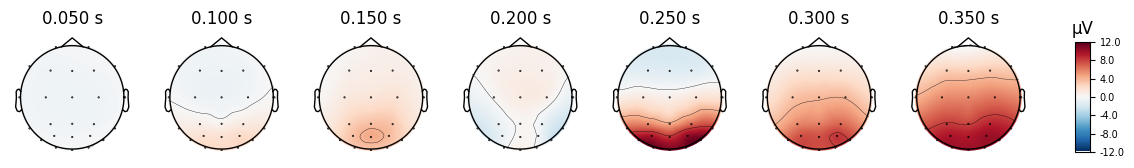

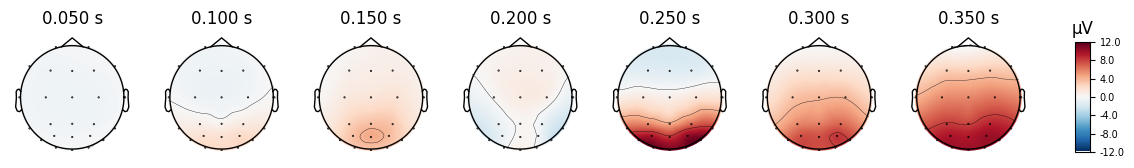

In [ ]:
times = np.arange(0.05, 0.40, 0.05)
evoked_condition1.plot_topomap(times)

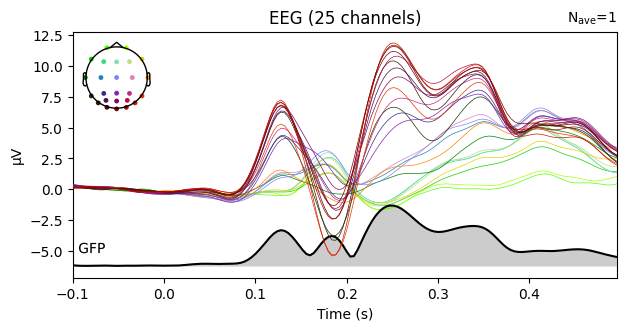

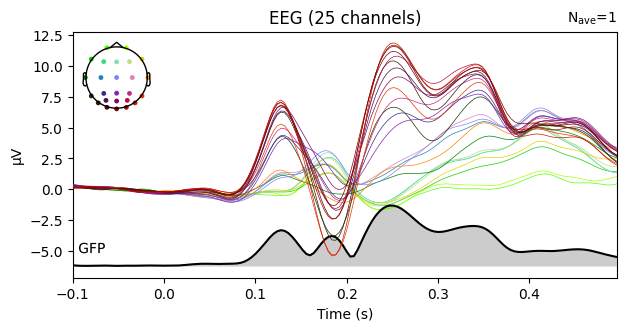

In [ ]:
evoked_condition2, ave_df = create_evoked(three_dim_array_cond2, "evoked_condition2")
# Specify the scaling factor and manually scale the data
scaling_factor = 1e-6
evoked_condition2.data *= scaling_factor

evoked_condition2.plot(spatial_colors=True, gfp=True)

### GFP of smile 3-0

### 差分evokedを作る関数
create_evoked()からの変更点
*   引数が3つ（最初の二つが引き算：引数1-引数2）
*   引き算するとtimeは0になってしまうので、その点を調整



In [ ]:
def create_diff(cond_name1, cond_name2, diff_name):
  # Calculate the mean along the first axis (axis=0)
  ave1 = np.mean(cond_name1, axis=0)
  ave2 = np.mean(cond_name2, axis=0)

  time = df_list_cond1[1]["time"]
  columns = list(df_list_cond1[1].columns)

  ave = ave1 - ave2

  # Create DataFrame and set the first column as the index
  ave_df = pd.DataFrame(ave, index=time, columns=columns)

  #ave_df.set_index(df_list_cond1[1].columns[0], inplace=True)
  ave_df = ave_df.iloc[:-1] # the last row contains NaN, so delete it

  columns_to_delete = ['time', 'Ref', 'HEOGR', 'HEOGL', 'VEOGL']
  ave_df = ave_df.drop(columns=columns_to_delete)

  # Extract relevant information
  time_points = ave_df.index.astype(float)
  channel_names = list(ave_df.columns)

  # Create an info structure for MNE-Python
  sfreq = 250  # attention! not 250 Hz
  info = mne.create_info(channel_names, sfreq, ch_types='eeg')
  info.set_montage(montage)

  # Convert tmin to seconds
  tmin_seconds = time_points[0] / 1000.0


  # Create Evoked objects for each condition using the average data
  evoked_obj = mne.EvokedArray(ave_df.iloc[:, :].values.T, info, tmin=tmin_seconds, comment=diff_name)
  return evoked_obj, ave_df

In [ ]:
three_minus_zero, aa = create_diff(three_dim_array_cond2, three_dim_array_cond1, "3-0")

In [ ]:
scaling_factor = 1e-6
three_minus_zero.data *= scaling_factor

In [ ]:
aa

,Fp1,Fp2,F7,F3,Fz,F4,F8,T7,C3,Cz,...,P4,P8,PO7,PO3,POz,PO4,PO8,O1,Oz,O2
time,,,,,,,,,,,,,,,,,,,,,
-100.0,2.161667e-07,4.990370e-08,2.007148e-07,-4.330741e-08,-2.782222e-08,-6.417407e-08,-1.078519e-08,-1.086296e-08,-1.115000e-07,-1.982704e-07,...,-1.086926e-07,-1.116667e-07,-1.121963e-07,-6.048148e-08,-7.216667e-08,-2.239630e-08,-4.392593e-09,-1.418074e-07,-1.814667e-07,-6.991481e-08
-96.0,1.721333e-07,4.573333e-08,1.910852e-07,-9.410370e-08,-5.742963e-08,-7.928889e-08,1.701111e-08,-3.777778e-10,-1.883000e-07,-2.585074e-07,...,-1.548407e-07,-1.566481e-07,-1.702037e-07,-1.445778e-07,-1.173741e-07,-4.672593e-08,-2.901481e-08,-1.902889e-07,-2.053815e-07,-7.396296e-08
-92.0,1.117074e-07,6.985556e-08,1.549185e-07,-1.268704e-07,-8.259630e-08,-9.485556e-08,3.312593e-08,3.724815e-08,-2.551148e-07,-3.047037e-07,...,-1.960444e-07,-2.057556e-07,-2.337037e-07,-2.252889e-07,-1.604778e-07,-7.149630e-08,-6.912593e-08,-2.261630e-07,-2.182222e-07,-7.566296e-08
-88.0,5.300000e-08,1.116148e-07,1.056333e-07,-1.327148e-07,-9.244444e-08,-1.025333e-07,4.094815e-08,8.204444e-08,-2.980852e-07,-3.249185e-07,...,-2.217185e-07,-2.468741e-07,-2.931370e-07,-2.902296e-07,-1.914296e-07,-8.940741e-08,-1.129741e-07,-2.464630e-07,-2.152222e-07,-7.016296e-08
-84.0,1.604444e-08,1.515111e-07,6.023333e-08,-1.059667e-07,-7.641852e-08,-9.109259e-08,4.701481e-08,1.108963e-07,-3.065741e-07,-3.100259e-07,...,-2.229667e-07,-2.656852e-07,-3.360444e-07,-3.287519e-07,-2.011704e-07,-9.227778e-08,-1.452481e-07,-2.487852e-07,-1.943815e-07,-5.478148e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480.0,-3.444185e-07,-5.426630e-07,3.424815e-08,2.102519e-07,1.963333e-08,-2.275111e-07,-4.543889e-07,5.371407e-07,2.957370e-07,1.764333e-07,...,-4.896296e-08,-6.943704e-08,5.170370e-08,-1.885963e-07,-1.067333e-07,-7.318889e-08,4.377778e-08,1.379963e-07,7.708889e-08,1.045926e-08
484.0,-3.649741e-07,-4.743519e-07,1.023852e-07,2.747815e-07,8.669259e-08,-1.765963e-07,-4.107889e-07,6.039481e-07,3.649519e-07,2.556037e-07,...,3.777407e-08,-1.898148e-08,1.249481e-07,-1.023889e-07,1.352593e-08,4.302593e-08,1.349556e-07,2.265630e-07,1.943259e-07,1.278556e-07
488.0,-3.825444e-07,-4.232111e-07,1.650185e-07,3.426852e-07,1.658000e-07,-1.084444e-07,-3.650667e-07,6.773556e-07,4.580000e-07,3.524111e-07,...,1.487148e-07,5.670741e-08,2.015333e-07,5.074074e-09,1.487000e-07,1.806296e-07,2.393889e-07,3.197000e-07,3.211259e-07,2.538185e-07


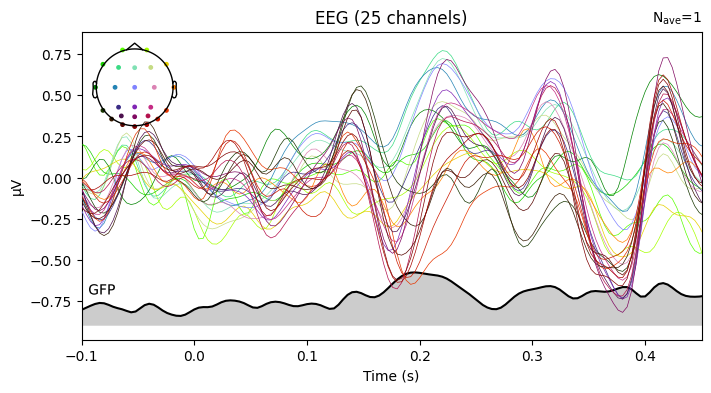

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

three_minus_zero.plot(spatial_colors=True, gfp=True, xlim=(-0.1, 0.45), axes=ax)

plt.tight_layout()
plt.show()

fig.savefig("3-0_GFP.png", dpi=500)

## GFP for average ERPs (across standard conditions)

In [ ]:
# Import each participant's csv (time * electrode) and add it to df_list (list of data frame)

df_list_smile0 = []
df_list_smile1 = []
df_list_smile2 = []
df_list_smile3 = []

for n, par in enumerate(participants, start=1):
  df_smile0 = pd.read_csv("happy_" + par + "_ERP_Smile 0 .txt", delimiter='\t', index_col=0, header=None)
  df_smile1 = pd.read_csv("happy_" + par + "_ERP_Smile 1 .txt", delimiter='\t', index_col=0, header=None)
  df_smile2 = pd.read_csv("happy_" + par + "_ERP_Smile 2 .txt", delimiter='\t', index_col=0, header=None)
  df_smile3 = pd.read_csv("happy_" + par + "_ERP_Smile 3 .txt", delimiter='\t', index_col=0, header=None)

  df_list_smile0.append(df_smile0.transpose())
  df_list_smile1.append(df_smile1.transpose())
  df_list_smile2.append(df_smile2.transpose())
  df_list_smile3.append(df_smile3.transpose())

# Convert each DataFrame to a NumPy array
array_list_smile0 = [df.to_numpy() for df in df_list_smile0]
array_list_smile1 = [df.to_numpy() for df in df_list_smile1]
array_list_smile2 = [df.to_numpy() for df in df_list_smile2]
array_list_smile3 = [df.to_numpy() for df in df_list_smile3]

# Stack the NumPy arrays along the first dimension to create a 3D array
# axis=0は、デフォルトなので指定しなくてもいい。これは奥行き方向に重ねることを意味する。
three_dim_array_smile0 = np.stack(array_list_smile0, axis=0)
three_dim_array_smile1 = np.stack(array_list_smile1, axis=0)
three_dim_array_smile2 = np.stack(array_list_smile2, axis=0)
three_dim_array_smile3 = np.stack(array_list_smile3, axis=0)

# Check the shape of the resulting 3D array
print(three_dim_array_smile0.shape)
print(three_dim_array_smile1.shape)

# Average across conditions
stacked_arrays = np.stack([three_dim_array_smile0, three_dim_array_smile1, three_dim_array_smile2, three_dim_array_smile3], axis=0)

# Compute the mean along the new axis (axis=0)
average_array = np.mean(stacked_arrays, axis=0)
print(average_array.shape)

(27, 151, 30)
(27, 151, 30)
(27, 151, 30)


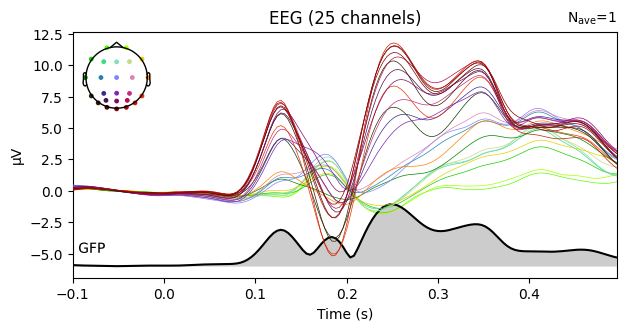

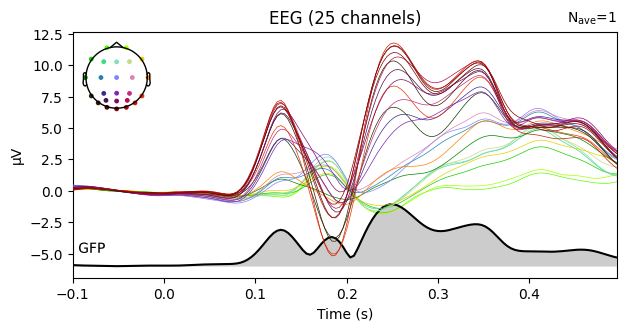

In [ ]:
average_across_standards, ave_standard_df = create_evoked(average_array, "average across standard conditions")

# mv = microvolt
ave_standard_df_mv = ave_standard_df.copy()

# Specify the scaling factor and manually scale the data
scaling_factor = 1e-6
average_across_standards.data *= scaling_factor

average_across_standards.plot(spatial_colors=True, gfp=True)

### Manually-created GFP df

Float64Index([128.0, 184.0, 248.0, 340.0, 456.0], dtype='float64', name='time')


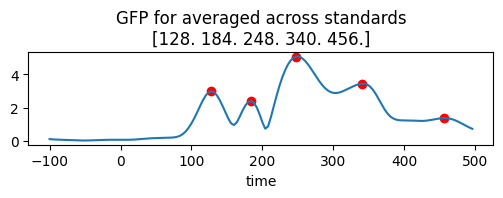

In [ ]:
from scipy.signal import argrelextrema

fig, ax = plt.subplots(figsize=(6, 1.2))
gfp_df = ave_standard_df_mv.std(axis=1)

# Find indices of local maxima (change 'order' if needed)
peaks_indices = argrelextrema(gfp_df.values, np.greater, order=8)

peaks_x_values = gfp_df.index[peaks_indices[0]]

gfp_df.plot(ax=ax)
ax.scatter(peaks_x_values, gfp_df.iloc[peaks_indices[0]], color='red', marker='o')

ax.set_title("GFP for averaged across standards\n"+str(peaks_x_values.values))

print(peaks_x_values)

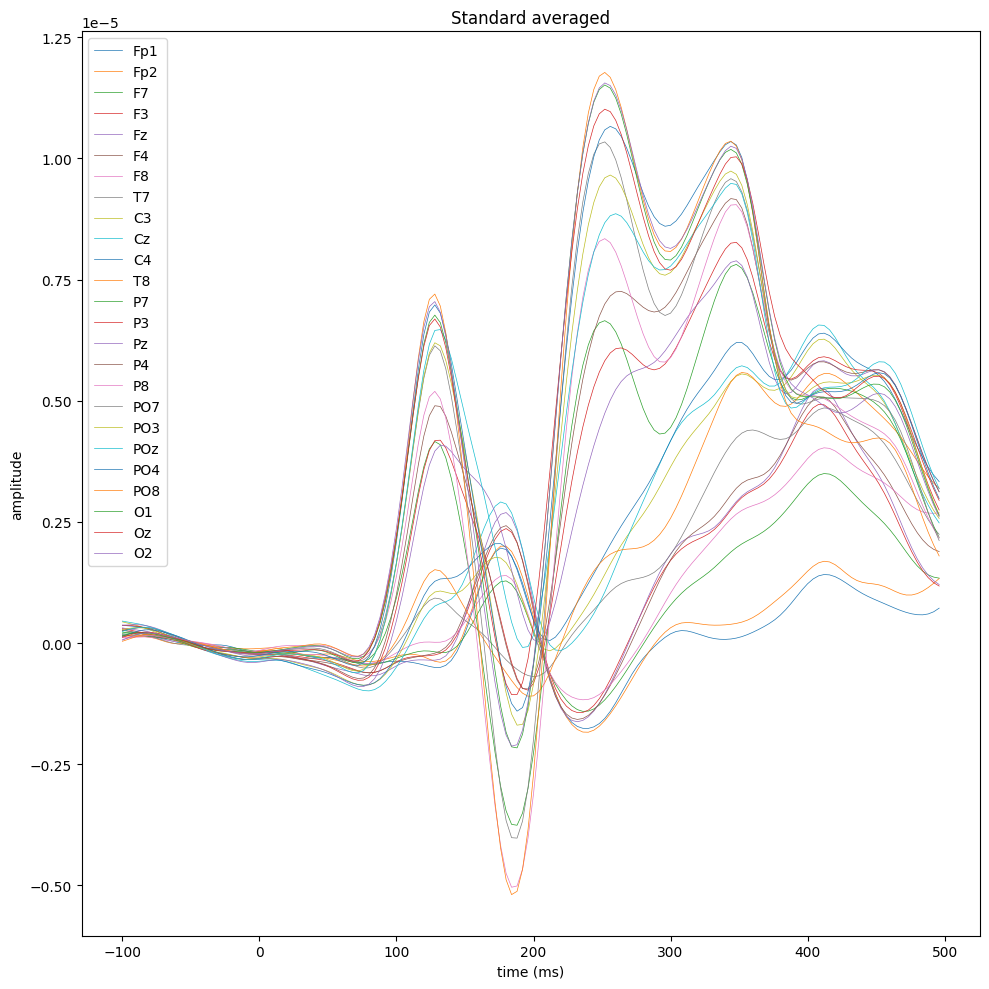

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ave_standard_df.plot(linewidth=0.5, ax=ax)

ax.set_xlabel('time (ms)')
ax.set_ylabel('amplitude')
ax.set_title('Standard averaged')

ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

fig.savefig("standard_averaged.png", dpi=500)

## Interactive graph

In [ ]:
import plotly.express as px

fig = px.line(ave_standard_df, x=ave_standard_df.index, y=ave_standard_df.columns,
              labels={'index': 'time (ms)', 'value': 'amplitude'},
              title='Standard Averaged')

# Show the plot interactively
fig.show()

## Low and High EC group

### Creating 3d array (participants/time/channel) for EC low and high group

In [ ]:
# Participants list of each EC group
EC_low_pars = ['s1', 's2', 's3', 's8', 's11', 's12', 's15', 's16', 's20', 's21', 's22', 's23', 's24']
EC_high_pars = ['s4', 's5', 's6', 's7', 's9', 's13', 's14', 's17', 's18', 's19', 's25', 's26', 's27', 's28']

# Function
def create_3d_array(participants_list):
  # condition list for each group
  df_list_cond1 = []
  df_list_cond2 = []

  for n, par in enumerate(participants_list, start=1):
    df_cond1 = pd.read_csv("happy_" + par + "_ERP_Smile 0 .txt", delimiter='\t', index_col=0, header=None)
    df_cond2 = pd.read_csv("happy_" + par + "_ERP_Smile 3 .txt", delimiter='\t', index_col=0, header=None)
    df_list_cond1.append(df_cond1.transpose())
    df_list_cond2.append(df_cond2.transpose())

  # Convert each DataFrame to a NumPy array
  array_list_cond1 = [df.to_numpy() for df in df_list_cond1]
  array_list_cond2 = [df.to_numpy() for df in df_list_cond2]

  # Stack the NumPy arrays along the first dimension to create a 3D array
  # axis=0は、デフォルトなので指定しなくてもいい。これは奥行き方向に重ねることを意味する。
  three_dim_array_cond1 = np.stack(array_list_cond1, axis=0)
  three_dim_array_cond2 = np.stack(array_list_cond2, axis=0)
  return three_dim_array_cond1, three_dim_array_cond2

In [ ]:
EC_low_3d_cond1, EC_low_3d_cond2 = create_3d_array(EC_low_pars)
EC_high_3d_cond1, EC_high_3d_cond2 = create_3d_array(EC_high_pars)

### GFP for EC low (3-0)

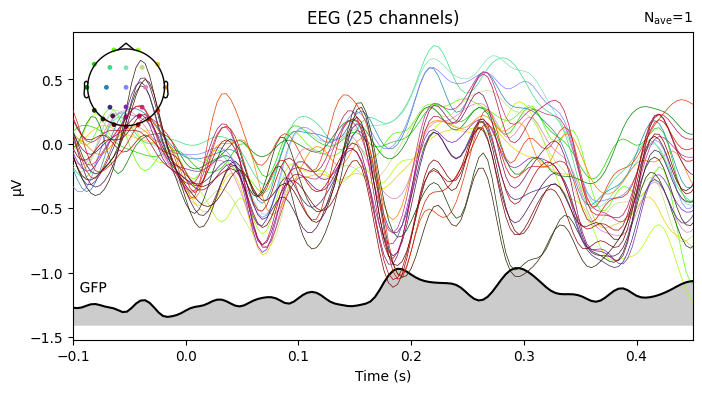

<Figure size 640x480 with 0 Axes>

In [ ]:
three_minus_zero_EClow, EClow_df = create_diff(EC_low_3d_cond2, EC_low_3d_cond1, "3-0 EC low")

fig, ax = plt.subplots(figsize=(8, 4))

EClow_df_mv = EClow_df.copy()
# Specify the scaling factor and manually scale the data
scaling_factor = 1e-6
three_minus_zero_EClow.data *= scaling_factor

three_minus_zero_EClow.plot(spatial_colors=True, gfp=True, xlim=(-0.1, 0.45), axes=ax)

plt.tight_layout()
plt.show()

fig.savefig("3-0_EClow_GFP.png", dpi=50)

### GFP for EC high (3-0)

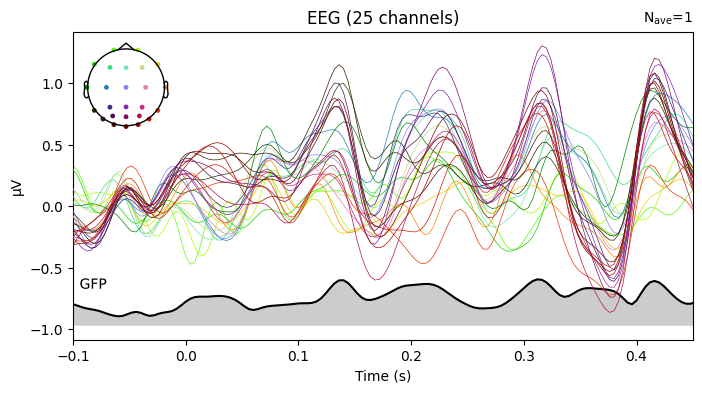

<Figure size 640x480 with 0 Axes>

In [ ]:
three_minus_zero_EChigh, EChigh_df = create_diff(EC_high_3d_cond2, EC_high_3d_cond1, "3-0 EC high")

fig, ax = plt.subplots(figsize=(8, 4))

EChigh_df_mv = EChigh_df.copy()
# Specify the scaling factor and manually scale the data
scaling_factor = 1e-6
three_minus_zero_EChigh.data *= scaling_factor

three_minus_zero_EChigh.plot(spatial_colors=True, gfp=True, xlim=(-0.1, 0.45), axes=ax)

plt.tight_layout()
plt.show()

fig.savefig("3-0_EChigh_GFP.png", dpi=50)

In [ ]:
from scipy.signal import argrelextrema

def gfp_plot(data, title, ylim_bottom=None, ylim_top=None):
  fig, ax = plt.subplots(figsize=(7, 3))
  gfp_df = data.std(axis=1)

  # Find indices of local maxima (change 'order' if needed)
  peaks_indices = argrelextrema(gfp_df.values, np.greater, order=8)

  peaks_x_values = gfp_df.index[peaks_indices[0]]

  gfp_df.plot(ax=ax)
  ax.scatter(peaks_x_values, gfp_df.iloc[peaks_indices[0]], color='red', marker='o')

  ax.set_title(title +"\n"+str(peaks_x_values.values))

  if ylim_bottom is not None and ylim_top is not None:
        ax.set_ylim(ylim_bottom, ylim_top)

  ax.set_xlabel("time (ms)")
  fig.tight_layout()
  fig.savefig(title + ".png", dpi=500)

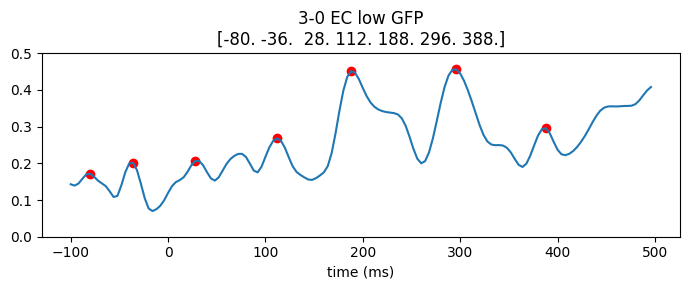

In [ ]:
gfp_plot(EClow_df_mv, "3-0 EC low GFP", 0, 0.5)

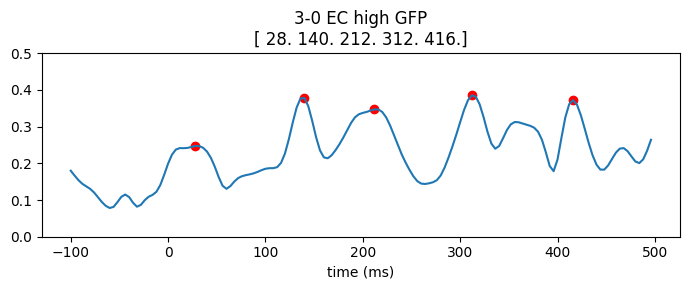

In [ ]:
gfp_plot(EChigh_df_mv, "3-0 EC high GFP", 0, 0.5)

### note: how to mask

In [ ]:
"""
# Define a threshold and create the mask
mask = evoked.data > 1e-13

# Select times and plot
times = (0.09, 0.1, 0.11)
mask_params = dict(markersize=10, markerfacecolor="y")
evoked.plot_topomap(times, ch_type="mag", mask=mask, mask_params=mask_params)
"""

'\n# Define a threshold and create the mask\nmask = evoked.data > 1e-13\n\n# Select times and plot\ntimes = (0.09, 0.1, 0.11)\nmask_params = dict(markersize=10, markerfacecolor="y")\nevoked.plot_topomap(times, ch_type="mag", mask=mask, mask_params=mask_params)\n'

## 注意：以下のコードは無視してください。

In [ ]:
"""
# Create a layout
layout = mne.channels.make_eeg_layout(info)

# Get the positions of the channels
pos = layout.pos[:, :2]

# Select a specific time point for visualization
time_point_index = 6  # Change this to the index of the time point you want to visualize
t_ob_at_specific_time = t_obs[time_point_index, :]

# Plot the topomap for the specific time point
fig, ax = plt.subplots()
mne.viz.plot_topomap(t_ob_at_specific_time, pos, axes=ax, show=True, contours=6)
ax.set_title("6")
plt.show()
"""

'\n# Create a layout\nlayout = mne.channels.make_eeg_layout(info)\n\n# Get the positions of the channels\npos = layout.pos[:, :2]\n\n# Select a specific time point for visualization\ntime_point_index = 6  # Change this to the index of the time point you want to visualize\nt_ob_at_specific_time = t_obs[time_point_index, :]\n\n# Plot the topomap for the specific time point\nfig, ax = plt.subplots()\nmne.viz.plot_topomap(t_ob_at_specific_time, pos, axes=ax, show=True, contours=6)\nax.set_title("6")\nplt.show()\n'